<a href="https://colab.research.google.com/github/Aleksei-Ia/ML_2024/blob/main/ML_homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (base)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

**Максимальная оценка за дз**
> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

`Your answer here`

фиксация сидов позволяет получать одинаковые результаты при каждом повторном запуске обучения модели и тем самым позволяет отслеживать и оценивать влияние вносимых изменений и работы разных моделей.

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [ ]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.55 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [ ] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


**Бонус**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)

In [ ]:
# your code here
print('\033[1m10 случайных строк тренировочного датасета\033[0m\n', df_train.sample(10))
print(f'\n\033[1mПервые 5 объектов тестового датасета\033[0m\n' + df_test['name'].head().to_string(index=False))
print(f'\n\033[1mПоследние 5 объектов тестового датасета\033[0m\n' + df_test['name'].tail().to_string(index=False))
print(f'\n\033[1mКолонки тренировочного датасета, для которых есть пропущенные значения\033[0m\n{df_train.isna().sum()[lambda x: x > 0]}')
print(f'\n\033[1mКолонки тестового датасета, для которых есть пропущенные значения\033[0m\n{df_test.isna().sum()[lambda x: x > 0]}')
print('\n\033[1mДубликаты тренировочного датасета\033[0m:', df_train.duplicated().sum())
print('\n\033[1mДубликаты тестового датасета\033[0m:', df_test.duplicated().sum())
print('\n\033[1mДубликаты обьединённого датасета\033[0m:', pd.concat([df_train, df_test]).duplicated().sum(), '\n')
!pip install ydata-profiling
from ydata_profiling import ProfileReport
profile = ProfileReport(df_train, title="Pandas Profiling Report")
profile.to_file("report.html")
print('\n\033[1mДашборд создан и помещён в файл report.html\033[0m')

10 случайных строк тренировочного датасета
                                         name  year  selling_price  km_driven  \
6565        Renault KWID Climber 1.0 MT BSIV  2019         300000      35000   
2943                      Maruti Wagon R LXI  2013         225000      58343   
2024                    Hyundai i20 Asta 1.2  2013         360000      30000   
263                     Hyundai i20 1.2 Asta  2010         300000      70000   
4586        Skoda Octavia L and K 1.9 TDI MT  2005         250000     120000   
4479                         Maruti Ciaz ZXi  2016         700000      20000   
4881  Hyundai Grand i10 1.2 Kappa Magna BSIV  2017         445000      27000   
3583          Ford Ecosport 1.5 DV5 MT Trend  2016         515000      68609   
6361                  Hyundai Verna 1.4 VTVT  2014         500000      33400   
4108                     Hyundai i20 Era 1.2  2015         490000      45900   

        fuel       seller_type transmission         owner     mileage  \
65

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]


Дашборд создан и помещён в файл report.html


Мы обнаружили пропуски. Давайте избавимся от них.

- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [ ]:
print(f'\033[1mОсновные статистики по числовым столбцам для трейна:\033[0m\n\n{df_train.describe()}')
print(f'\n\n\033[1mОсновные статистики по категориальным столбцам для трейна:\033[0m\n\n{df_train.describe(include=["object"])}')
print(f'\n\n\033[1mОсновные статистики по числовым столбцам для теста:\033[0m\n\n{df_test.describe()}')
print(f'\n\n\033[1mОсновные статистики по категориальным столбцам для теста:\033[0m\n\n{df_test.describe(include=["object"])}')

Основные статистики по числовым столбцам для трейна:

              year  selling_price     km_driven        seats
count  6999.000000   6.999000e+03  6.999000e+03  6797.000000
mean   2013.818403   6.395152e+05  6.958462e+04     5.419008
std       4.053095   8.089419e+05  5.772400e+04     0.965767
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.549990e+05  3.500000e+04     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
75%    2017.000000   6.750000e+05  9.700000e+04     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000


Основные статистики по категориальным столбцам для трейна:

                          name    fuel seller_type transmission        owner  \
count                     6999    6999        6999         6999         6999   
unique                    1924       4           3            2            5   
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner   
freq           

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB


In [ ]:
print(set(df_train['mileage'].apply(type)))
print(df_train['mileage'].unique())

{<class 'float'>, <class 'str'>}
['23.4 kmpl' '21.14 kmpl' '23.0 kmpl' '16.1 kmpl' '20.14 kmpl'
 '17.3 km/kg' '23.59 kmpl' '20.0 kmpl' '19.01 kmpl' '17.3 kmpl'
 '19.3 kmpl' nan '18.9 kmpl' '18.15 kmpl' '19.7 kmpl' '22.54 kmpl'
 '21.0 kmpl' '25.5 kmpl' '26.59 kmpl' '21.5 kmpl' '21.4 kmpl' '24.7 kmpl'
 '18.2 kmpl' '16.8 kmpl' '24.3 kmpl' '14.0 kmpl' '33.44 km/kg'
 '23.95 kmpl' '17.0 kmpl' '20.63 kmpl' '13.93 kmpl' '16.0 kmpl'
 '17.8 kmpl' '12.55 kmpl' '12.99 kmpl' '14.8 kmpl' '13.5 kmpl' '26.0 kmpl'
 '27.3 kmpl' '11.36 kmpl' '17.68 kmpl' '18.53 kmpl' '14.84 kmpl'
 '21.12 kmpl' '20.36 kmpl' '21.27 kmpl' '18.16 kmpl' '22.0 kmpl'
 '25.1 kmpl' '20.51 kmpl' '21.66 kmpl' '25.2 kmpl' '22.9 kmpl'
 '16.02 kmpl' '20.54 kmpl' '22.77 kmpl' '15.71 kmpl' '23.1 kmpl'
 '19.02 kmpl' '19.81 kmpl' '26.2 km/kg' '16.47 kmpl' '15.04 kmpl'
 '18.5 kmpl' '19.1 kmpl' '21.79 kmpl' '18.8 kmpl' '21.21 kmpl'
 '11.79 kmpl' '19.0 kmpl' '14.3 kmpl' '15.1 kmpl' '19.09 kmpl'
 '22.32 kmpl' '21.9 kmpl' '14.53 kmpl' '21.63 k

In [ ]:
def convert_mileage(mileage, fuel):
    if 'km/kg' in str(mileage):
        mileage_value = float(mileage.replace(' km/kg', ''))
        if fuel == 'Petrol':
            return round(mileage_value * 0.75, 2)
        elif fuel == 'Diesel':
            return round(mileage_value * 0.85, 2)
        elif fuel == 'LPG':
            return round(mileage_value * 0.55, 2)
        elif fuel == 'CNG':
            return round(mileage_value * 0.72, 2)
    return mileage
df_train['mileage'] = df_train.apply(lambda row: convert_mileage(row['mileage'], row['fuel']), axis=1)
df_test['mileage'] = df_test.apply(lambda row: convert_mileage(row['mileage'], row['fuel']), axis=1)
print(df_train['mileage'].unique())
print(set(df_train['mileage'].apply(type)))

['23.4 kmpl' '21.14 kmpl' '23.0 kmpl' '16.1 kmpl' '20.14 kmpl' 9.52
 '23.59 kmpl' '20.0 kmpl' '19.01 kmpl' '17.3 kmpl' '19.3 kmpl' nan
 '18.9 kmpl' '18.15 kmpl' '19.7 kmpl' '22.54 kmpl' '21.0 kmpl' '25.5 kmpl'
 '26.59 kmpl' '21.5 kmpl' '21.4 kmpl' '24.7 kmpl' '18.2 kmpl' '16.8 kmpl'
 '24.3 kmpl' '14.0 kmpl' 24.08 '23.95 kmpl' '17.0 kmpl' '20.63 kmpl'
 '13.93 kmpl' '16.0 kmpl' '17.8 kmpl' '12.55 kmpl' '12.99 kmpl'
 '14.8 kmpl' '13.5 kmpl' '26.0 kmpl' '27.3 kmpl' '11.36 kmpl' '17.68 kmpl'
 '18.53 kmpl' '14.84 kmpl' '21.12 kmpl' '20.36 kmpl' '21.27 kmpl'
 '18.16 kmpl' '22.0 kmpl' '25.1 kmpl' '20.51 kmpl' '21.66 kmpl'
 '25.2 kmpl' '22.9 kmpl' '16.02 kmpl' '20.54 kmpl' '22.77 kmpl'
 '15.71 kmpl' '23.1 kmpl' '19.02 kmpl' '19.81 kmpl' 14.41 '16.47 kmpl'
 '15.04 kmpl' '18.5 kmpl' '19.1 kmpl' '21.79 kmpl' '18.8 kmpl'
 '21.21 kmpl' '11.79 kmpl' '19.0 kmpl' '14.3 kmpl' '15.1 kmpl'
 '19.09 kmpl' '22.32 kmpl' '21.9 kmpl' '14.53 kmpl' '21.63 kmpl'
 '20.85 kmpl' '20.45 kmpl' '19.67 kmpl' '23.01 kmpl'

In [ ]:
df_train['mileage'] = df_train['mileage'].apply(lambda x: float(x.replace(' kmpl', '')) if isinstance(x, str) else x)
df_test['mileage'] = df_test['mileage'].apply(lambda x: float(x.replace(' kmpl', '')) if isinstance(x, str) else x)
print(df_train['mileage'].unique())
print(set(df_train['mileage'].apply(type)))

[23.4  21.14 23.   16.1  20.14  9.52 23.59 20.   19.01 17.3  19.3    nan
 18.9  18.15 19.7  22.54 21.   25.5  26.59 21.5  21.4  24.7  18.2  16.8
 24.3  14.   24.08 23.95 17.   20.63 13.93 16.   17.8  12.55 12.99 14.8
 13.5  26.   27.3  11.36 17.68 18.53 14.84 21.12 20.36 21.27 18.16 22.
 25.1  20.51 21.66 25.2  22.9  16.02 20.54 22.77 15.71 23.1  19.02 19.81
 14.41 16.47 15.04 18.5  19.1  21.79 18.8  21.21 11.79 19.   14.3  15.1
 19.09 22.32 21.9  14.53 21.63 20.85 20.45 19.67 23.01 17.92 20.77 17.01
 22.37 19.33 12.83 22.48 16.78 14.67 15.   13.96 14.28 18.   12.07 26.21
 10.8  13.6  16.3  14.74 15.6  19.56 22.69 19.16 18.12 12.1  17.5  42.
 20.4  18.6  21.1  19.44 13.   21.43 22.95 15.3  28.09 20.3  17.4  19.15
 17.6  28.4  14.1  22.74 17.57 16.95 17.21 25.17 15.37 13.2  24.52 14.2
 19.4  26.8  25.4  27.28 17.97 12.8  16.55 12.05 21.02 17.9  15.96 17.1
 17.19 21.01 24.   25.6  21.38 23.84 23.08 14.24 20.71 15.64 14.5  16.34
 27.39 11.1  15.03 20.92 23.8  24.4  15.29 21.19 22.5  19.6 

In [ ]:
print(df_train['engine'].unique())
print(set(df_train['engine'].apply(type)))

['1248 CC' '1498 CC' '1396 CC' '1298 CC' '1197 CC' '1061 CC' '796 CC'
 '1364 CC' '1399 CC' '1461 CC' '993 CC' nan '1198 CC' '998 CC' '1591 CC'
 '2179 CC' '1368 CC' '1497 CC' '2982 CC' '2494 CC' '2143 CC' '2477 CC'
 '2755 CC' '1968 CC' '1196 CC' '1373 CC' '1598 CC' '1998 CC' '1086 CC'
 '1194 CC' '1798 CC' '1405 CC' '1582 CC' '999 CC' '2487 CC' '1999 CC'
 '2987 CC' '1995 CC' '1451 CC' '1969 CC' '2967 CC' '2497 CC' '1797 CC'
 '1991 CC' '2362 CC' '1493 CC' '1341 CC' '1199 CC' '1794 CC' '1193 CC'
 '2696 CC' '799 CC' '1495 CC' '1186 CC' '1047 CC' '2498 CC' '2523 CC'
 '1120 CC' '624 CC' '1496 CC' '1984 CC' '2354 CC' '793 CC' '1799 CC'
 '936 CC' '1956 CC' '814 CC' '1997 CC' '1948 CC' '2997 CC' '1172 CC'
 '2489 CC' '2499 CC' '2609 CC' '2953 CC' '1150 CC' '1994 CC' '1388 CC'
 '1462 CC' '2956 CC' '1527 CC' '2199 CC' '995 CC' '1599 CC' '2993 CC'
 '1586 CC' '1390 CC' '909 CC' '2393 CC' '3198 CC' '1499 CC' '3604 CC'
 '1339 CC' '2092 CC' '1595 CC' '2496 CC' '1596 CC' '1597 CC' '2596 CC'
 '2148 CC' '1

In [ ]:
df_train['engine'] = df_train['engine'].apply(lambda x: float(x.replace(' CC', '')) if isinstance(x, str) else x)
df_test['engine'] = df_test['engine'].apply(lambda x: float(x.replace(' CC', '')) if isinstance(x, str) else x)
print(df_train['engine'].unique())
print(set(df_train['engine'].apply(type)))

[1248. 1498. 1396. 1298. 1197. 1061.  796. 1364. 1399. 1461.  993.   nan
 1198.  998. 1591. 2179. 1368. 1497. 2982. 2494. 2143. 2477. 2755. 1968.
 1196. 1373. 1598. 1998. 1086. 1194. 1798. 1405. 1582.  999. 2487. 1999.
 2987. 1995. 1451. 1969. 2967. 2497. 1797. 1991. 2362. 1493. 1341. 1199.
 1794. 1193. 2696.  799. 1495. 1186. 1047. 2498. 2523. 1120.  624. 1496.
 1984. 2354.  793. 1799.  936. 1956.  814. 1997. 1948. 2997. 1172. 2489.
 2499. 2609. 2953. 1150. 1994. 1388. 1462. 2956. 1527. 2199.  995. 1599.
 2993. 1586. 1390.  909. 2393. 3198. 1499. 3604. 1339. 2092. 1595. 2496.
 1596. 1597. 2596. 2148. 1299. 1590. 2231. 2694. 2200. 1795. 1896. 1796.
 1422. 1489. 2359. 2197. 2999. 1781. 2650. 1343. 2446. 3498. 2198. 2776.
 1950.]
{<class 'float'>}


In [ ]:
print(df_train['max_power'].unique())
print(set(df_train['max_power'].apply(type)))

['74 bhp' '103.52 bhp' '90 bhp' '88.2 bhp' '81.86 bhp' '57.5 bhp' '37 bhp'
 '67.1 bhp' '68.1 bhp' '108.45 bhp' '60 bhp' '73.9 bhp' nan '67 bhp'
 '82 bhp' '46.3 bhp' '88.73 bhp' '64.1 bhp' '98.6 bhp' '88.8 bhp'
 '83.1 bhp' '47.3 bhp' '73.8 bhp' '34.2 bhp' '88.5 bhp' '35 bhp'
 '40.3 bhp' '121.3 bhp' '138.03 bhp' '160.77 bhp' '117.3 bhp' '116.3 bhp'
 '67.05 bhp' '168.5 bhp' '100 bhp' '120.7 bhp' '98.63 bhp' '175.56 bhp'
 '171.5 bhp' '100.6 bhp' '174.33 bhp' '187.74 bhp' '170 bhp' '78.9 bhp'
 '88.76 bhp' '86.8 bhp' '108.495 bhp' '108.62 bhp' '93.7 bhp' '103.6 bhp'
 '98.59 bhp' '189 bhp' '67.04 bhp' '68.05 bhp' '58.2 bhp' '82.85 bhp'
 '81.80 bhp' '120 bhp' '94.68 bhp' '160 bhp' '155 bhp' '69.01 bhp'
 '126.32 bhp' '138.1 bhp' '83.14 bhp' '83.8 bhp' '126.2 bhp' '62.1 bhp'
 '86.7 bhp' '188 bhp' '214.56 bhp' '177 bhp' '148.31 bhp' '254.79 bhp'
 '190 bhp' '177.46 bhp' '204 bhp' '141 bhp' '241.4 bhp' '282 bhp'
 '150 bhp' '108.5 bhp' '147.5 bhp' '103.5 bhp' '183 bhp' '181.04 bhp'
 '157.7 bhp' '164

In [ ]:
df_train['max_power'] = df_train['max_power'].replace(' bhp', np.nan).apply(lambda x: float(x.replace(' bhp', '')) if isinstance(x, str) else x)
df_test['max_power'] = df_test['max_power'].replace('', np.nan).apply(lambda x: float(x.replace(' bhp', '')) if isinstance(x, str) else x)
print(df_train['max_power'].unique())
print(set(df_train['max_power'].apply(type)))
print(set(df_test['max_power'].apply(type)))

[ 74.    103.52   90.     88.2    81.86   57.5    37.     67.1    68.1
 108.45   60.     73.9       nan  67.     82.     46.3    88.73   64.1
  98.6    88.8    83.1    47.3    73.8    34.2    88.5    35.     40.3
 121.3   138.03  160.77  117.3   116.3    67.05  168.5   100.    120.7
  98.63  175.56  171.5   100.6   174.33  187.74  170.     78.9    88.76
  86.8   108.495 108.62   93.7   103.6    98.59  189.     67.04   68.05
  58.2    82.85   81.8   120.     94.68  160.    155.     69.01  126.32
 138.1    83.14   83.8   126.2    62.1    86.7   188.    214.56  177.
 148.31  254.79  190.    177.46  204.    141.    241.4   282.    150.
 108.5   147.5   103.5   183.    181.04  157.7   164.7    91.1   400.
  68.     81.83   75.     85.8    87.2    53.    118.     83.     84.
  58.16  147.94   74.02   80.     88.7    97.7   121.36  162.     53.3
 140.     73.     94.    100.57   82.9    83.11   70.    153.86  121.
 126.3    73.97   69.     99.6   102.    105.     63.     79.4    97.9
  63.1  

In [ ]:
print(df_train['torque'].unique())
print(set(df_train['torque'].apply(type)))

['190Nm@ 2000rpm' '250Nm@ 1500-2500rpm' '22.4 kgm at 1750-2750rpm'
 '11.5@ 4,500(kgm@ rpm)' '113.75nm@ 4000rpm' '7.8@ 4,500(kgm@ rpm)'
 '59Nm@ 2500rpm' '170Nm@ 1800-2400rpm' '160Nm@ 2000rpm' '248Nm@ 2250rpm'
 '78Nm@ 4500rpm' nan '84Nm@ 3500rpm' '115Nm@ 3500-3600rpm' '62Nm@ 3000rpm'
 '219.7Nm@ 1500-2750rpm' '200Nm@ 1750rpm' '115Nm@ 4000rpm' '69Nm@ 3500rpm'
 '172.5Nm@ 1750rpm' '6.1kgm@ 3000rpm' '60Nm@ 3500rpm' '90Nm@ 3500rpm'
 '151Nm@ 4850rpm' '104Nm@ 4000rpm' '320Nm@ 1700-2700rpm'
 '250Nm@ 1750-2500rpm' '145Nm@ 4600rpm' '146Nm@ 4800rpm'
 '343Nm@ 1400-3400rpm' '200Nm@ 1400-3400rpm' '200Nm@ 1250-4000rpm'
 '400Nm@ 2000-2500rpm' '360Nm@ 1200-3400rpm' '200Nm@ 1200-3600rpm'
 '380Nm@ 1750-2500rpm' '400Nm@ 1750-3000rpm' '400Nm@ 1400-2800rpm'
 '200Nm@ 1750-3000rpm' '111.7Nm@ 4000rpm' '219.6Nm@ 1500-2750rpm'
 '112Nm@ 4000rpm' '250Nm@ 1500-3000rpm' '130Nm@ 4000rpm'
 '205Nm@ 1750-3250rpm' '280Nm@ 1350-4600rpm' '99.04Nm@ 4500rpm'
 '77Nm@ 3500rpm' '110Nm@ 3750rpm' '153Nm@ 3800rpm' '113.7Nm@ 4000rpm'


In [ ]:
df_train['torque'] = df_train['torque'].apply(lambda x: x.lower().replace('@',' ').replace('rpm', ' ').replace('at', ' ').replace('nm', ' ').replace('(', ' ').replace(')', ' ').replace('+/-500', '').replace('/', '').replace('~', '-').replace(',', '').replace('kgm', ' kgm') if isinstance(x, str) else x)
df_train['torque'] = df_train['torque'].apply(lambda x: ' '.join([str(round(float(value) * 9.80665, 2)) if i == 0 and 'kgm' in x else value for i, value in enumerate(x.split())]).replace('kgm', '') if isinstance(x, str) and 'kgm' in x else x)
df_train['torque'] = [item.split()[0] + ' ' + (lambda b: str((int(b.split('-')[0]) + int(b.split('-')[1])) // 2) if '-' in b else b)(item.split()[1]) if isinstance(item, str) and len(item.split()) == 2 else item for item in df_train['torque']]
df_train['torque'] = [float(round((float(item.split()[0]) * ((int(c.split('-')[0]) + int(c.split('-')[1])) // 2 if '-' in (c := item.split()[1]) else int(c)) * 2 * np.pi) / 60, 2)) if isinstance(item, str) and len(item.split()) == 2 else np.nan for item in df_train['torque']]
df_test['torque'] = df_test['torque'].apply(lambda x: x.lower().replace('@',' ').replace('rpm', ' ').replace('at', ' ').replace('nm', ' ').replace('(', ' ').replace(')', ' ').replace('+/-500', '').replace('/', '').replace('~', '-').replace(',', '').replace('kgm', ' kgm') if isinstance(x, str) else x)
df_test['torque'] = df_test['torque'].apply(lambda x: ' '.join([str(round(float(value) * 9.80665, 2)) if i == 0 and 'kgm' in x else value for i, value in enumerate(x.split())]).replace('kgm', '') if isinstance(x, str) and 'kgm' in x else x)
df_test['torque'] = [item.split()[0] + ' ' + (lambda b: str((int(b.split('-')[0]) + int(b.split('-')[1])) // 2) if '-' in b else b)(item.split()[1]) if isinstance(item, str) and len(item.split()) == 2 else item for item in df_test['torque']]
df_test['torque'] = [float(round((float(item.split()[0]) * ((int(c.split('-')[0]) + int(c.split('-')[1])) // 2 if '-' in (c := item.split()[1]) else int(c)) * 2 * np.pi) / 60, 2)) if isinstance(item, str) and len(item.split()) == 2 else np.nan for item in df_test['torque']]
print(df_train['torque'].unique())
print(set(df_train['torque'].apply(type)))
print(set(df_test['torque'].apply(type)))

[  39793.51   52359.88   51758.52   53146.32   47647.49   36045.06
   15446.16   37384.95   33510.32   58433.62   36756.63        nan
   30787.61   42751.84   19477.87   48889.73   36651.91   48171.09
   25289.82   31612.28   18793.01   21991.15   32986.72   76691.51
   43563.42   73722.71   55632.37   69848.08   73387.6    86205.3
   50265.48   54977.87   94247.78   86707.96   84561.2    99483.77
   87964.59   49741.88   46788.79   48867.47   46914.45   58904.86
   54454.27   53668.87   87231.56   46671.5    28221.97   43196.9
   60884.07   47626.54   47752.21   49700.     53407.08   78539.82
   85765.48   35342.92   63254.4    72466.07   63278.74   40500.37
   30190.71   51365.04   93074.92   95687.68   80005.89  129852.5
   89011.79   81812.31   68067.84  129590.7    82100.29   71994.83
   51181.78   87362.46   81681.41   40840.7    57857.66  100373.89
   93828.9   116615.92   48045.42   53250.     36311.58   61885.4
   49375.36   26022.86   47254.79   38536.87   41783.18   75398.22

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   float64
 9   engine         6797 non-null   float64
 10  max_power      6802 non-null   float64
 11  torque         6767 non-null   float64
 12  seats          6797 non-null   float64
dtypes: float64(5), int64(3), object(5)
memory usage: 711.0+ KB


In [ ]:
for col in df_train:
    if df_train[col].isna().sum() > 0:
        median_value = df_train[col].median()
        df_train[col] = df_train[col].fillna(median_value)
        if col in df_test.columns:
            df_test[col] = df_test[col].fillna(median_value)
print(f'\n\033[1mКолонки тренировочного датасета, для которых есть пропущенные значения после заполнения\033[0m\n{df_train.isna().any()}')
print(f'\n\033[1mКолонки тестового датасета, для которых есть пропущенные значения после заполнения\033[0m\n{df_test.isna().any()}')


Колонки тренировочного датасета, для которых есть пропущенные значения после заполнения
name             False
year             False
selling_price    False
km_driven        False
fuel             False
seller_type      False
transmission     False
owner            False
mileage          False
engine           False
max_power        False
torque           False
seats            False
dtype: bool

Колонки тестового датасета, для которых есть пропущенные значения после заполнения
name             False
year             False
selling_price    False
km_driven        False
fuel             False
seller_type      False
transmission     False
owner            False
mileage          False
engine           False
max_power        False
torque           False
seats            False
dtype: bool


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6999 non-null   float64
 9   engine         6999 non-null   float64
 10  max_power      6999 non-null   float64
 11  torque         6999 non-null   float64
 12  seats          6999 non-null   float64
dtypes: float64(5), int64(3), object(5)
memory usage: 711.0+ KB


### **Задание 2 (0.5 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [ ]:
print('\033[1mОбъекты с одинаковым признаковым описанием\033[0m:', df_train.drop(columns=["selling_price"]).duplicated().sum(), '\n')
print(df_train[df_train.drop(columns=["selling_price"]).duplicated()])
df_train = df_train.drop_duplicates(subset=df_train.columns.difference(['selling_price']), keep='first')
df_train.reset_index(drop=True, inplace=True)

Объекты с одинаковым признаковым описанием: 1159 

                                          name  year  selling_price  \
254                   Hyundai Grand i10 Sportz  2017         450000   
258                           Maruti Swift VXI  2012         330000   
268                     Maruti Swift Dzire VXI  2014         400000   
324   Jaguar XE 2016-2019 2.0L Diesel Prestige  2017        2625000   
325                              Lexus ES 300h  2019        5150000   
...                                        ...   ...            ...   
6947                    Chevrolet Spark 1.0 LS  2010         140000   
6984  Ford Freestyle Titanium Plus Diesel BSIV  2018         746000   
6989                    Maruti Swift Dzire VDI  2015         625000   
6997                           Tata Indigo CR4  2013         290000   
6998                           Tata Indigo CR4  2013         290000   

      km_driven    fuel seller_type transmission         owner  mileage  \
254       35000  Petr

In [ ]:
print('\033[1mОбъекты с одинаковым признаковым описанием\033[0m:', df_train.drop(columns=["selling_price"]).duplicated().sum(), '\n')
df_train.info()

Объекты с одинаковым признаковым описанием: 0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5840 non-null   object 
 1   year           5840 non-null   int64  
 2   selling_price  5840 non-null   int64  
 3   km_driven      5840 non-null   int64  
 4   fuel           5840 non-null   object 
 5   seller_type    5840 non-null   object 
 6   transmission   5840 non-null   object 
 7   owner          5840 non-null   object 
 8   mileage        5840 non-null   float64
 9   engine         5840 non-null   float64
 10  max_power      5840 non-null   float64
 11  torque         5840 non-null   float64
 12  seats          5840 non-null   float64
dtypes: float64(5), int64(3), object(5)
memory usage: 593.2+ KB


In [ ]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [ ]:
print('\033[1mЗадача полностью выполнена перед заданием 2, значения torque очищены и заменены на мощность в Вт вычисленную исходя из данных в столбце torque (Nm, kgm, rpm), после пустые значения заполнены медианой\033[0m')
print('\033[1mThe task has been fully completed before task 2, with the torque values cleaned and replaced with power in Vt, calculated based on the data in the torque column (Nm, kgm, rpm). Subsequently, the empty values were filled with the median\033[0m')

Задача полностью выполнена перед заданием 2, значения torque очищены и заменены на мощность в Вт вычисленную исходя из данных в столбце torque (Nm, kgm, rpm), после пустые значения заполнены медианой
The task has been fully completed before task 2, with the torque values cleaned and replaced with power in Vt, calculated based on the data in the torque column (Nm, kgm, rpm). Subsequently, the empty values were filled with the median


### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [ ]:
print('Опечатка в задаче \033[1mengnine\033[0m')

Опечатка в задаче engnine


In [ ]:
df_train['engine'] = df_train['engine'].astype(int)
df_train['seats'] = df_train['seats'].astype(int)
df_test['engine'] = df_test['engine'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)

<ipython-input-497-bc3a8e4b90bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['engine'] = df_train['engine'].astype(int)
<ipython-input-497-bc3a8e4b90bd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['seats'] = df_train['seats'].astype(int)


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5840 non-null   object 
 1   year           5840 non-null   int64  
 2   selling_price  5840 non-null   int64  
 3   km_driven      5840 non-null   int64  
 4   fuel           5840 non-null   object 
 5   seller_type    5840 non-null   object 
 6   transmission   5840 non-null   object 
 7   owner          5840 non-null   object 
 8   mileage        5840 non-null   float64
 9   engine         5840 non-null   int64  
 10  max_power      5840 non-null   float64
 11  torque         5840 non-null   float64
 12  seats          5840 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 593.2+ KB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1000 non-null   object 
 1   year           1000 non-null   int64  
 2   selling_price  1000 non-null   int64  
 3   km_driven      1000 non-null   int64  
 4   fuel           1000 non-null   object 
 5   seller_type    1000 non-null   object 
 6   transmission   1000 non-null   object 
 7   owner          1000 non-null   object 
 8   mileage        1000 non-null   float64
 9   engine         1000 non-null   int64  
 10  max_power      1000 non-null   float64
 11  torque         1000 non-null   float64
 12  seats          1000 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 101.7+ KB


### **Задание 5 (0.1 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [ ]:
print('Опечатка в задаче \033[1mрапсределения\033[0m')

Опечатка в задаче рапсределения


In [ ]:
print(f'\033[1mОсновные статистики по числовым столбцам для трейна:\033[0m\n\n{df_train.describe()}')
print(f'\n\n\033[1mОсновные статистики по категориальным столбцам для трейна:\033[0m\n\n{df_train.describe(include=["object"])}')
print(f'\n\n\033[1mОсновные статистики по числовым столбцам для теста:\033[0m\n\n{df_test.describe()}')
print(f'\n\n\033[1mОсновные статистики по категориальным столбцам для теста:\033[0m\n\n{df_test.describe(include=["object"])}')

Основные статистики по числовым столбцам для трейна:

              year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    19.331026  1429.448973   
std       4.095622   5.354320e+05  6.007114e+04     3.998141   485.662834   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.800000  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.300000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.070000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power        torque        seats  
count  5840.000000  5.840000e+03  5840.000000  
mean     87.910782  4.843240e+04     5.426712  
std      31.639585  6.268467e+04     0.982344  
min       0.000000  1.463459e+04     2.000000  
25%      68.

In [ ]:
assert df_train.shape == (5840, 13)

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

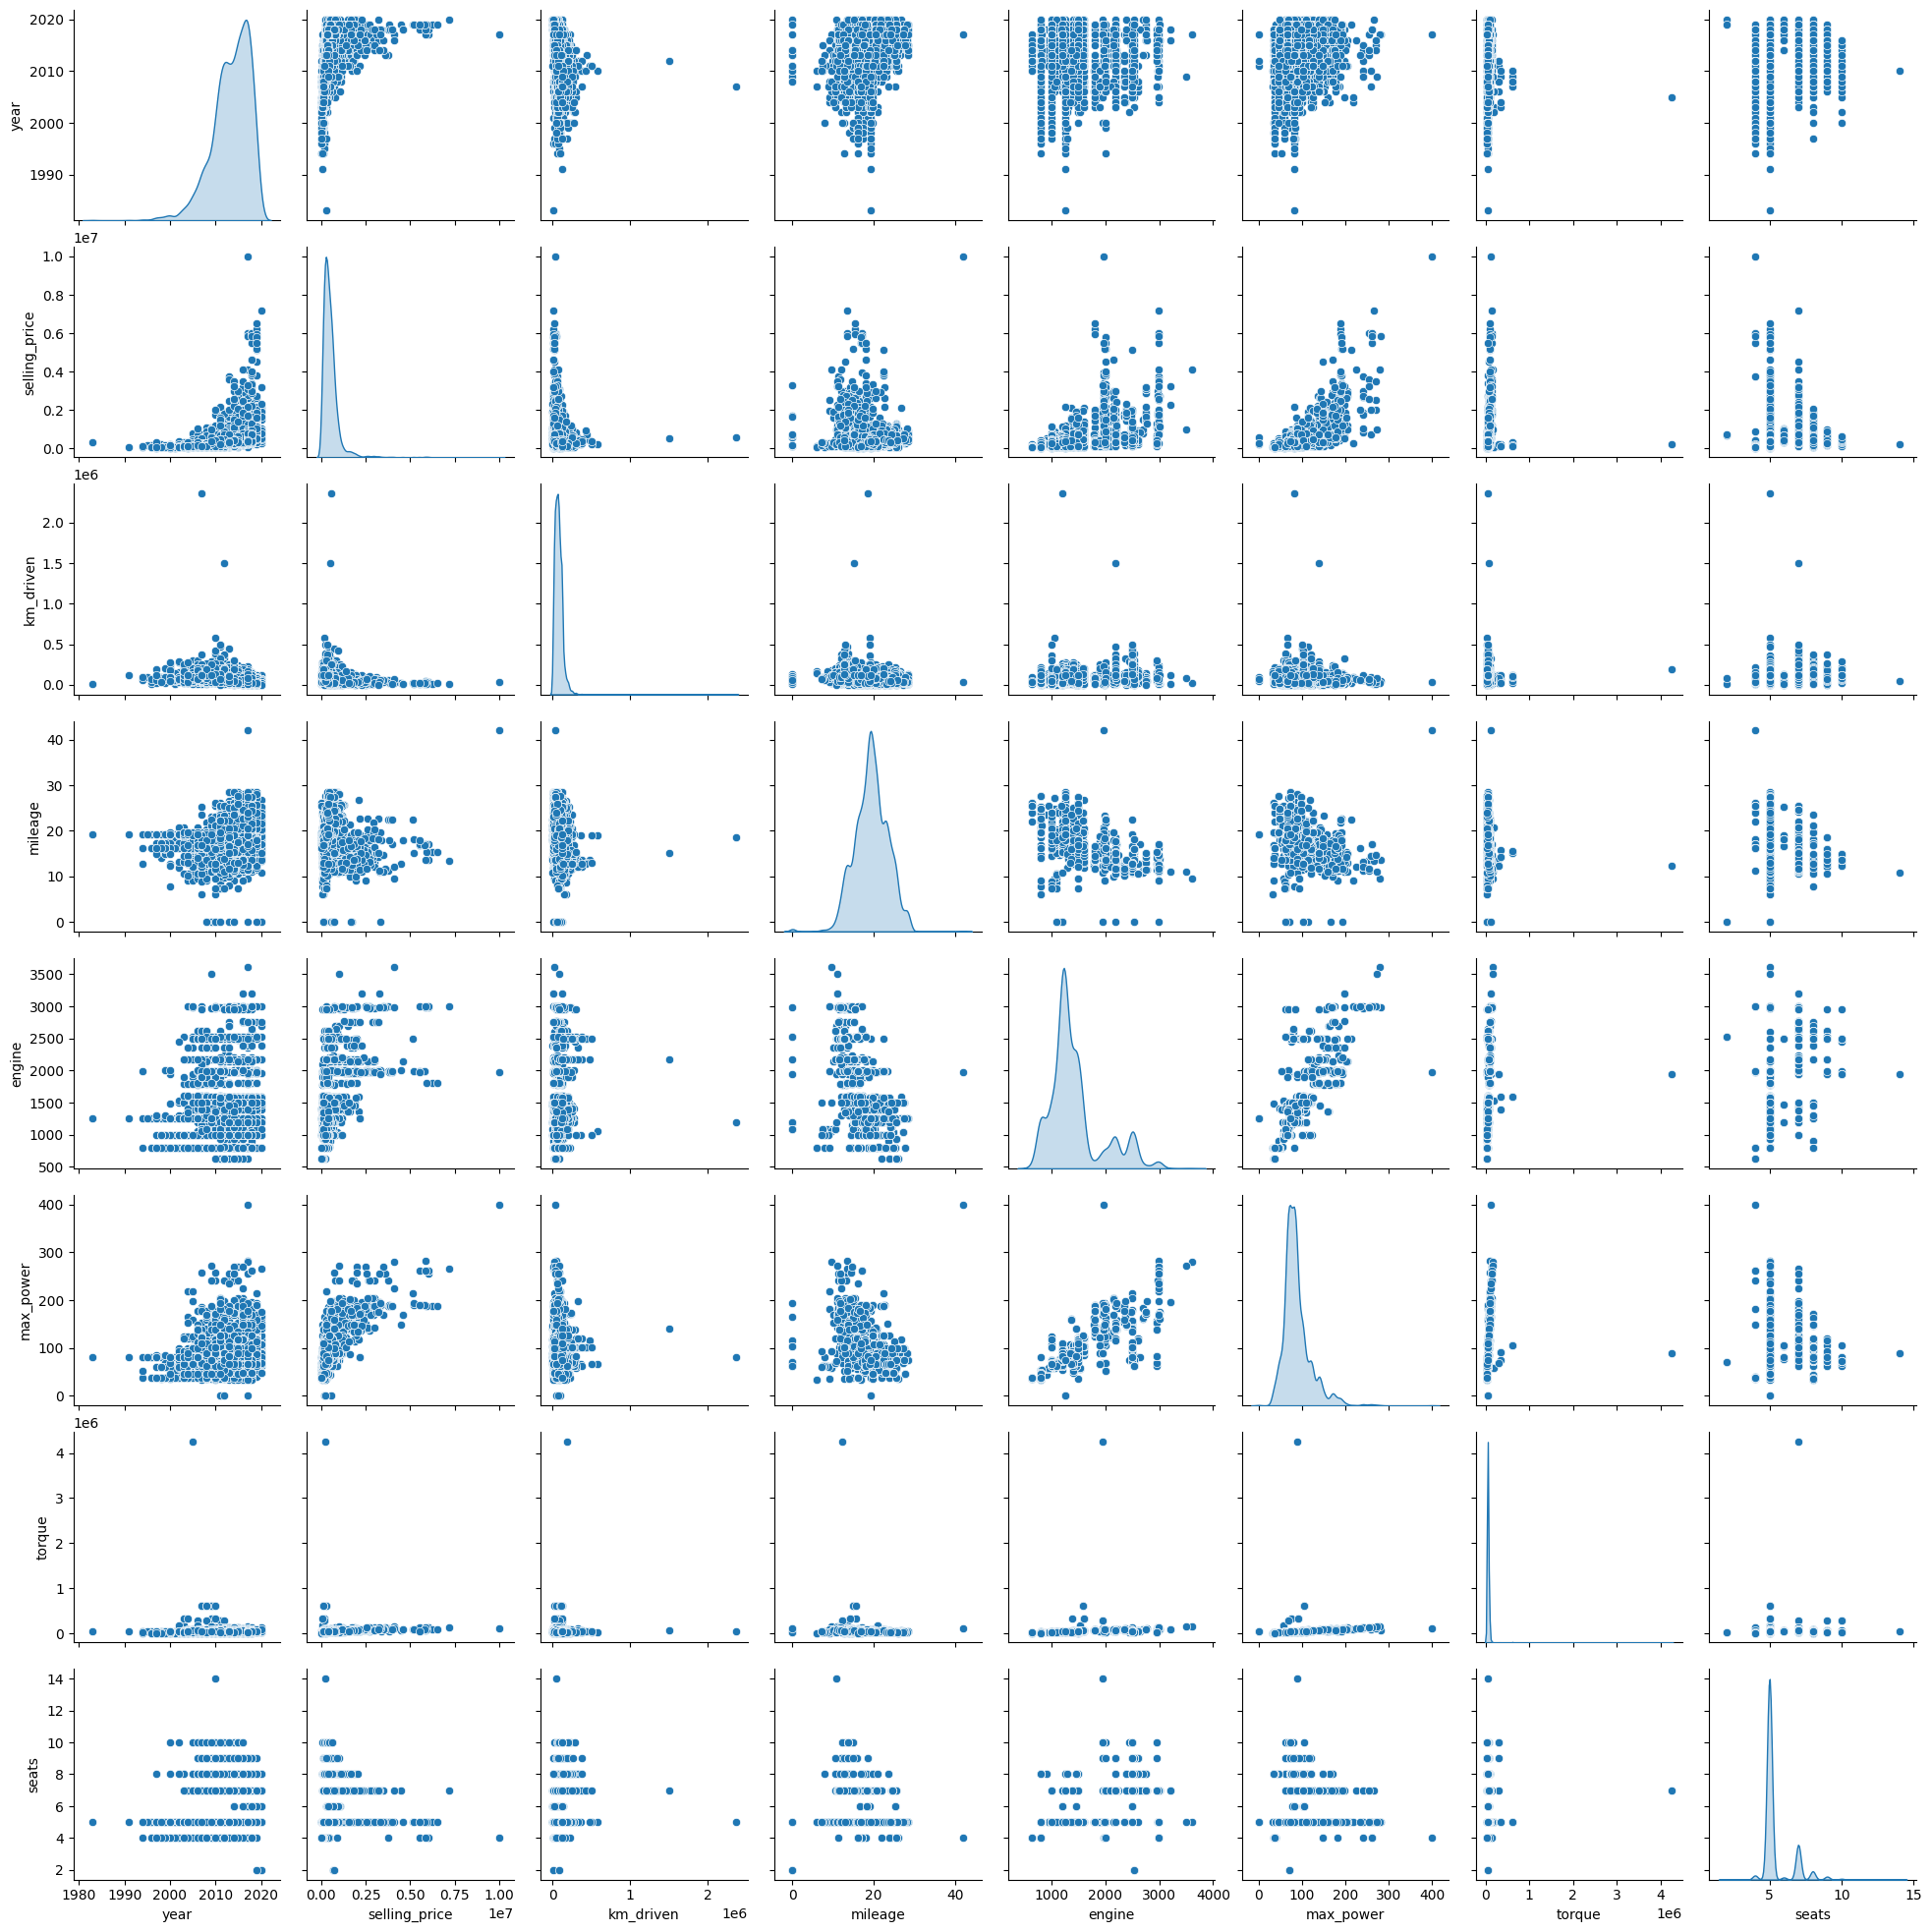

In [ ]:
sns.pairplot(df_train, diag_kind='kde')

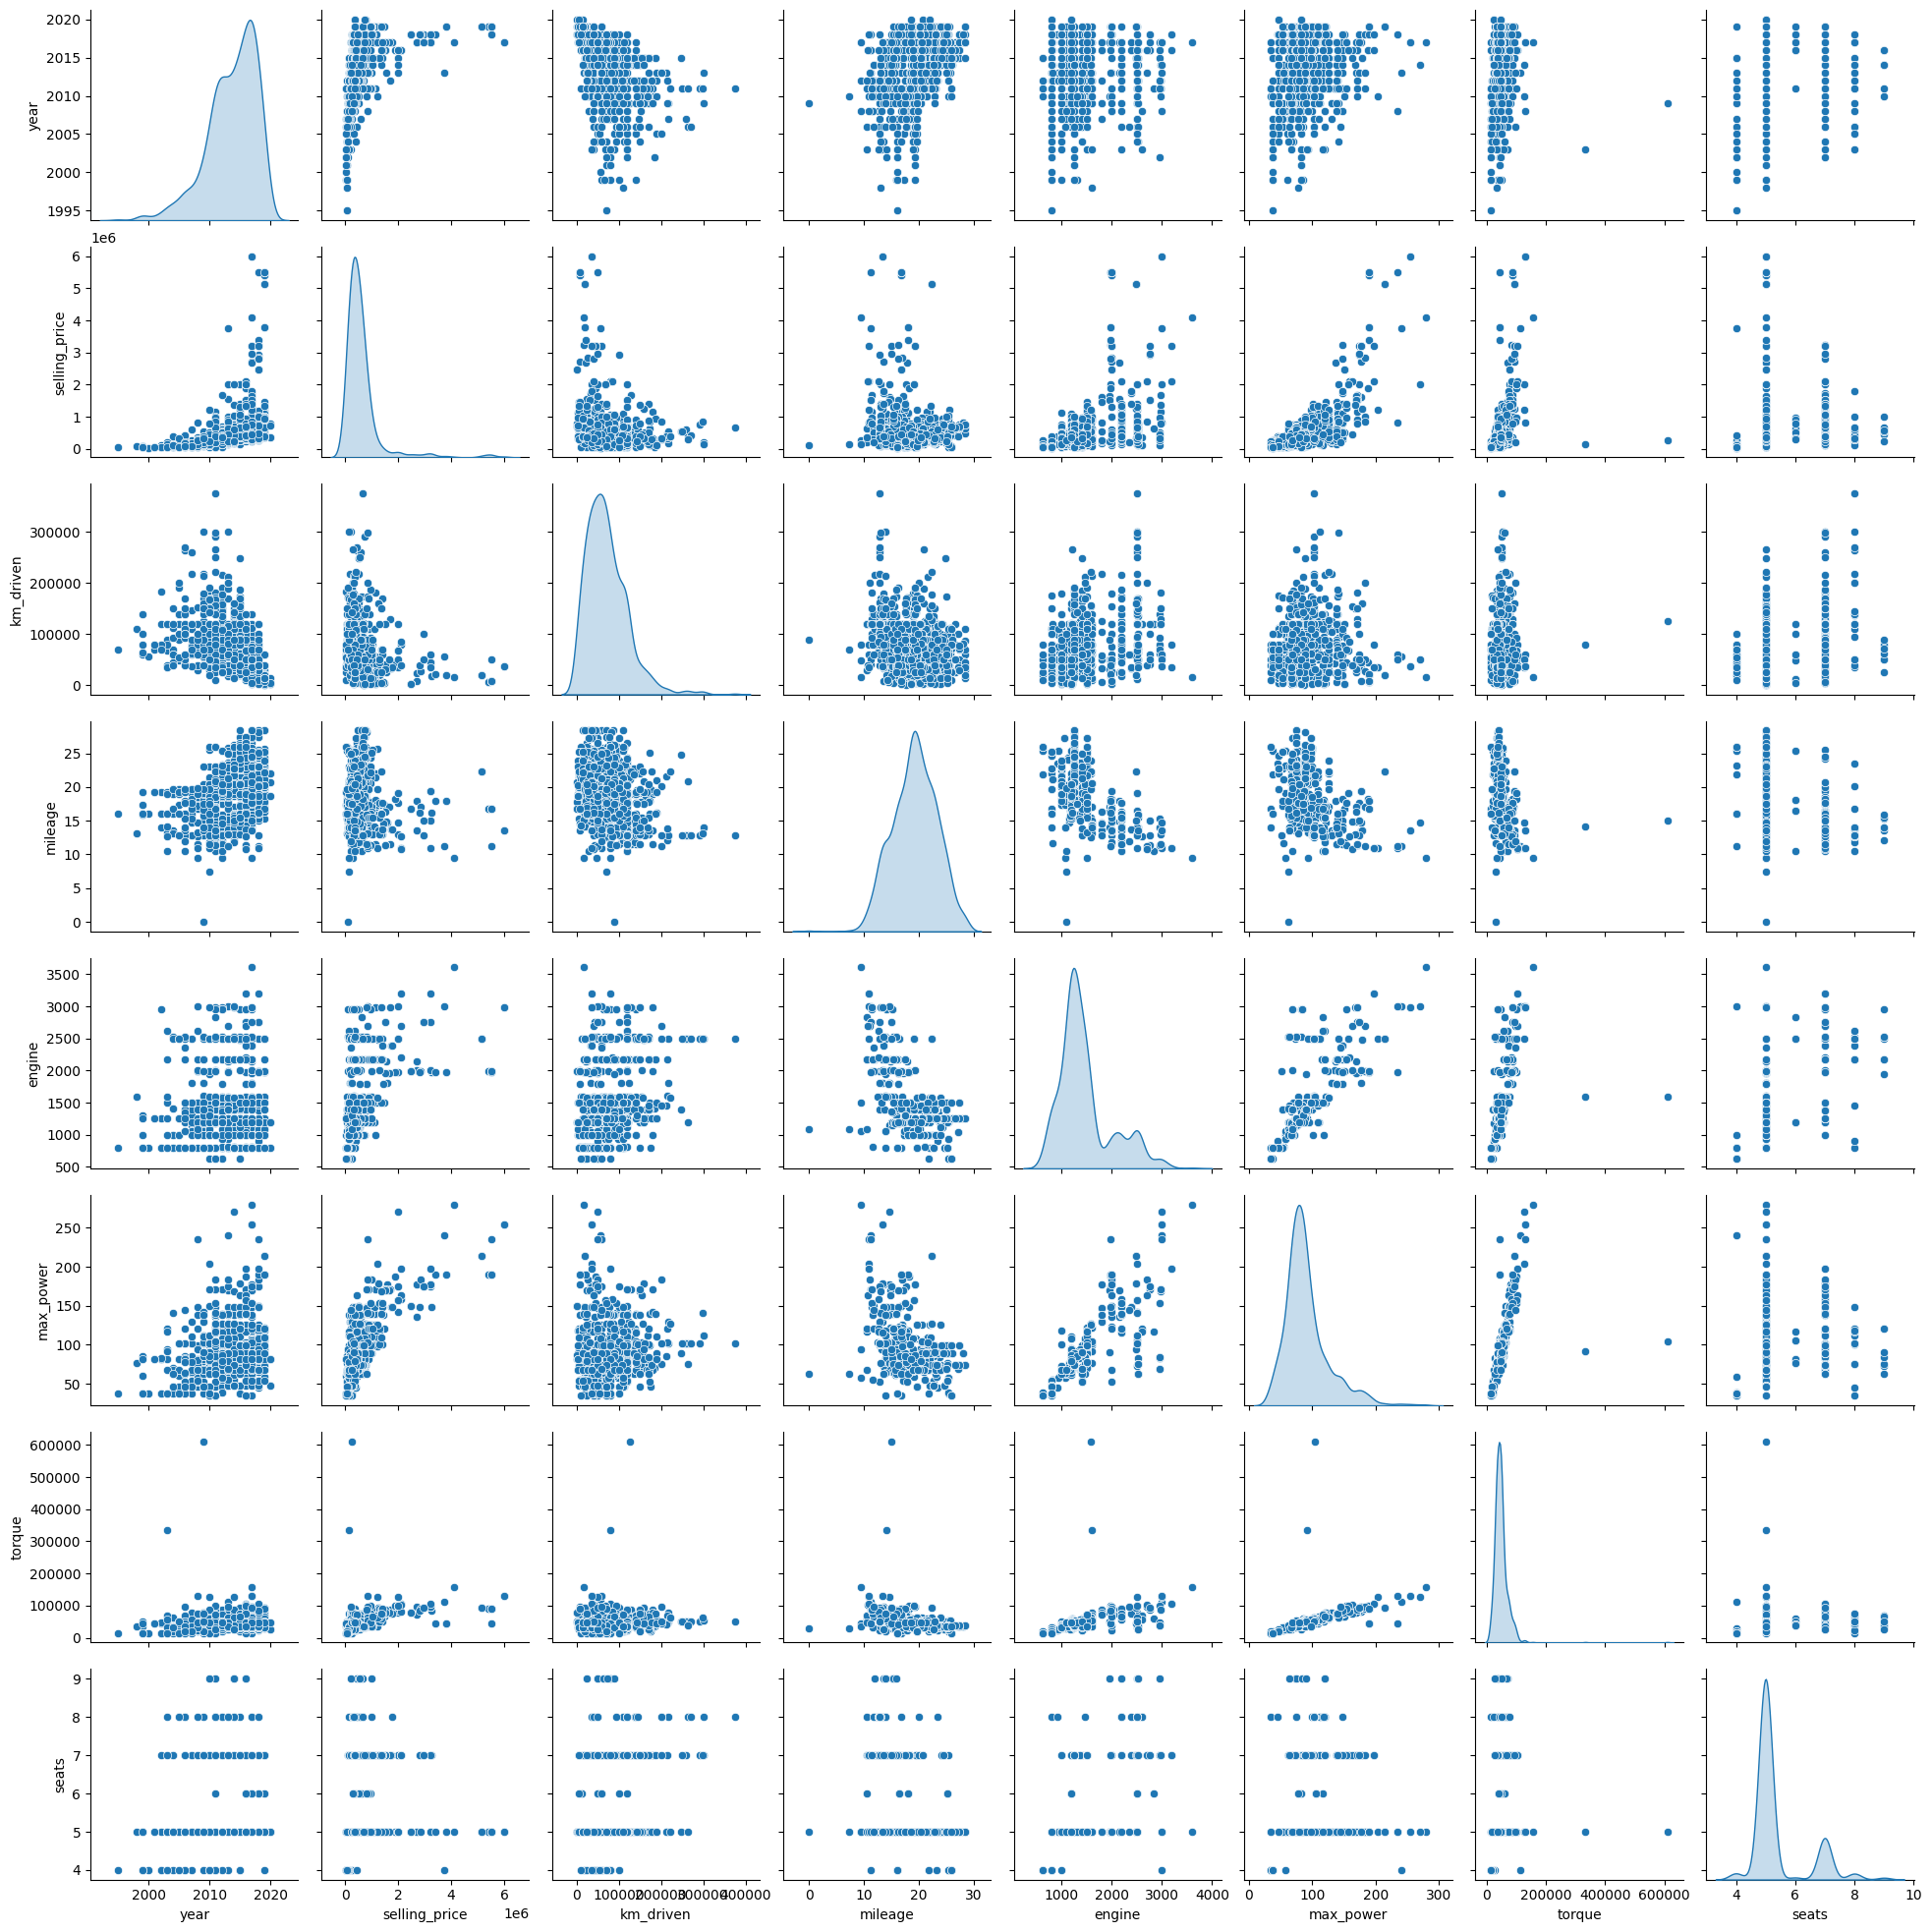

In [ ]:
sns.pairplot(df_test, diag_kind='kde')

`Your answer here`

1. По графику прослеживается связь целевой переменной с признаками: year, km_driven, engine, и max_power. Признаки mileage, torque, и seats показывают более слабую связь.
2. На основе графика можно предположить что наибольшая линейная связь будет у признаков year, engine, и max_power

3. Из похожего в 2х графиках можно выделить схожесть выбросов max_power и torque; схожие тенденции в зависимости между признаками year, km_driven, engine, max_power и целевой переменной.

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


<Axes: >

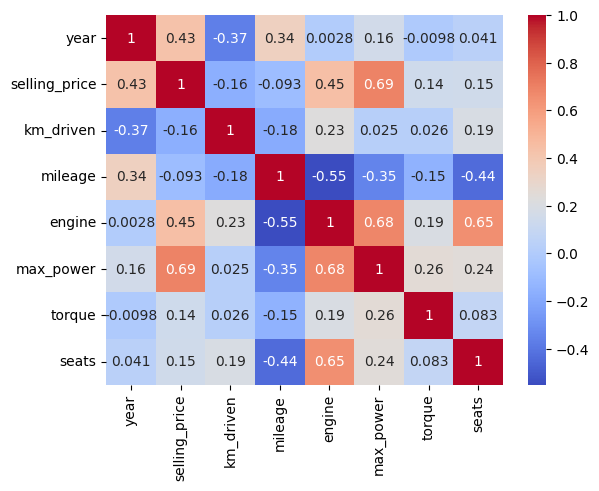

In [ ]:
corr = df_train.corr(numeric_only=True)
sns.heatmap(corr, cmap='coolwarm', annot=True)

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

`Your answer here`

1. Наименее скоррелированы между собой year и engine (0,0028)

2. Довольно сильная положительная линейная зависимость наблюдается между:

selling_price - max_power

engine - max_power

engine - seats

3. Утверждение "чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи" верно т.к наблюдается отрицательная корреляция -0.37, и утверждение подтверждается графиком pairplot. Важно отметить что в данном распределении есть незначительное количество выбросов.

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

In [ ]:
!pip install phik -q

interval columns not set, guessing: ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats']


/usr/local/lib/python3.10/dist-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable name is large: 1924. Are you sure this is not an interval variable? Analysis for pairs of variables including name can be slow.
  warnings.warn(


<Axes: >

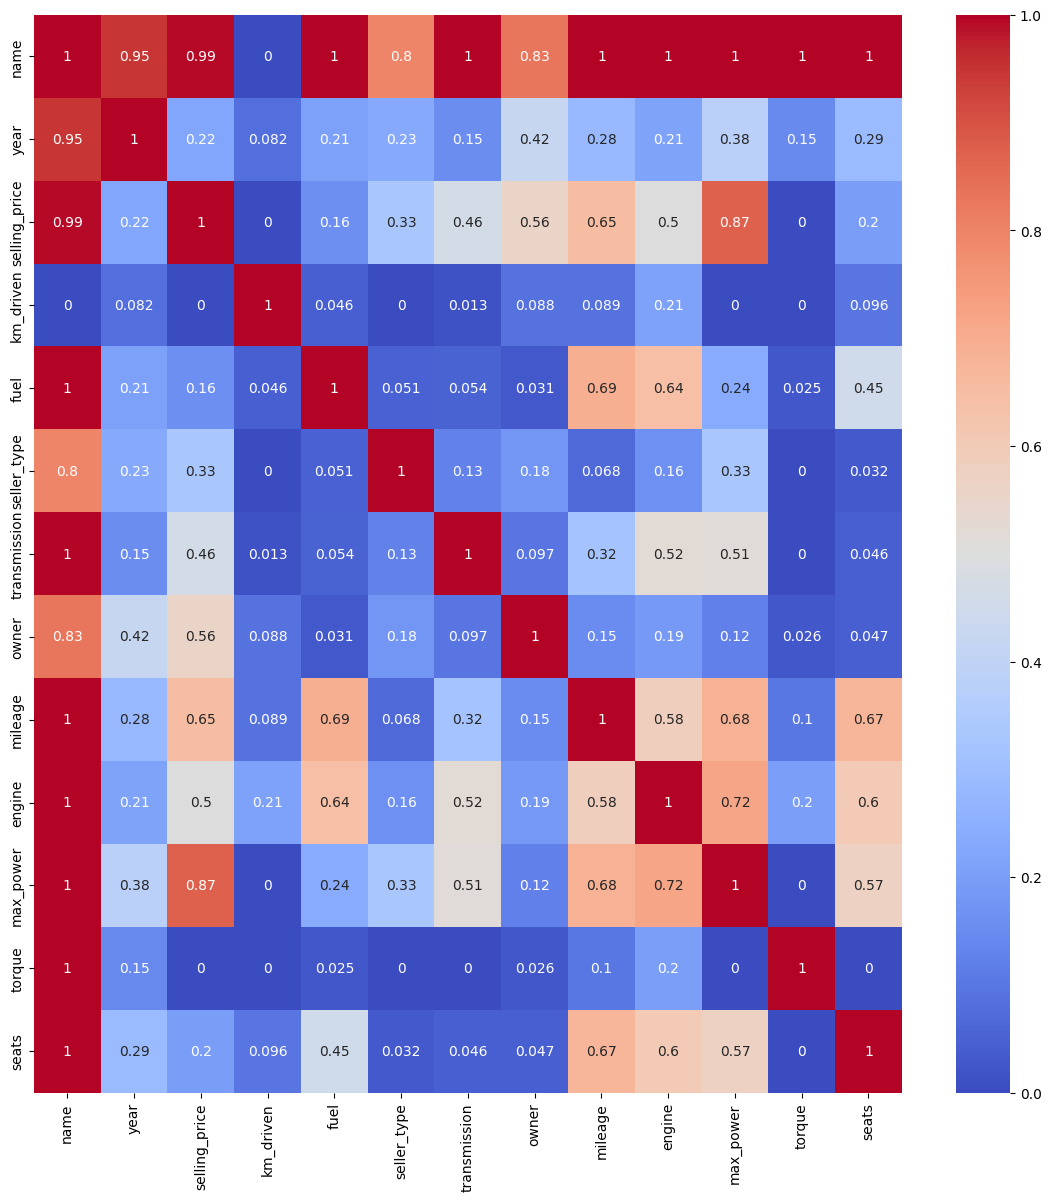

In [ ]:
import phik
plt.figure(figsize=(14,14))
ph = df_train.phik_matrix()
sns.heatmap(ph, cmap='coolwarm', annot=True)

Крайне важно сравнивать взаимосвязь всех имеющихся данных. В данном случае сравнение корреляций категориальных признаков с числовыми позволяет лучше понять, как эти типы данных взаимодействуют друг с другом. Например, 'owner' и 'selling_price' имеют значительный уровень корреляции 0,56. Важно отметить что обьект name имеет крайне высокий уровень корреляции с признаками и целевой переменной, но данный уровень связан с уникальностью значений name и его использование, вероятно, не принесёт положительного результата без дополнительной обработки.

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [ ]:
df_train1 = df_train.select_dtypes(include=['number']).copy()
df_test1 = df_test.select_dtypes(include=['number']).copy()

In [ ]:
df_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           5840 non-null   int64  
 1   selling_price  5840 non-null   int64  
 2   km_driven      5840 non-null   int64  
 3   mileage        5840 non-null   float64
 4   engine         5840 non-null   int64  
 5   max_power      5840 non-null   float64
 6   torque         5840 non-null   float64
 7   seats          5840 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 365.1 KB


In [ ]:
df_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           1000 non-null   int64  
 1   selling_price  1000 non-null   int64  
 2   km_driven      1000 non-null   int64  
 3   mileage        1000 non-null   float64
 4   engine         1000 non-null   int64  
 5   max_power      1000 non-null   float64
 6   torque         1000 non-null   float64
 7   seats          1000 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 62.6 KB


In [ ]:
y_train = df_train1['selling_price']
X_train = df_train1.drop(columns=['selling_price'])

In [ ]:
assert X_train.shape == (5840, 7)

In [ ]:
y_test = df_test1['selling_price']
X_test = df_test1.drop(columns=['selling_price'])

In [ ]:
assert X_test.shape == (1000, 7)

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model = LinearRegression()
model.fit(X_train, y_train)
train_predA = model.predict(X_train)
test_predA = model.predict(X_test)
r2_test = r2_score(y_test, test_predA)
print(f"R2 для теста: {r2_test:.4f}")
mse_test = MSE(y_test, test_predA)
print(f'MSE для теста: {mse_test:.4f}')
r2_train = r2_score(y_train, train_predA)
print(f'R2 для трейна: {r2_train:.4f}')
mse_train = MSE(y_train, train_predA)
print(f'MSE для трейна: {mse_train:.4f}')

R2 для теста: 0.5945
MSE для теста: 233097066692.6146
R2 для трейна: 0.5923
MSE для трейна: 116875266859.4052


$R^2$ говорит о том что модель одинаково работает для обоих наборов данных, и правильно предсказывает около 60%, при этом не переобучена. $MSE$ на тестовых данных значительно хуже чем на тренировочных что говорит о том что эффективность у модели в предсказании при работе с новыми данными крайне низкая.

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [ ]:
names = df_train1.drop(columns=['selling_price']).columns
sorted = np.argsort(np.abs(model.coef_))[::-1]
for x in sorted:
    print(f'\033[1mПризнак {names[x]}: информативность в порядке убывания\033[0m: {model.coef_[x]:.4f}')

Признак year: информативность в порядке убывания: 37737.9192
Признак seats: информативность в порядке убывания: -24724.3163
Признак max_power: информативность в порядке убывания: 10254.9848
Признак mileage: информативность в порядке убывания: 5860.5633
Признак engine: информативность в порядке убывания: 121.9079
Признак km_driven: информативность в порядке убывания: -0.7255
Признак torque: информативность в порядке убывания: -0.1770


Наиболее информативным в предсказании цены оказался признак year

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

r2_train_lasso = r2_score(y_train, y_pred_train)
mse_train_lasso = MSE(y_train, y_pred_train)
print(f'R^2 для Lasso трейна: {r2_train_lasso:.4f}')
print(f'MSE для Lasso трейна: {mse_train_lasso:.4f}')

r2_test_lasso = r2_score(y_test, y_pred_test)
mse_test_lasso = MSE(y_test, y_pred_test)
print(f'R^2 для Lasso теста: {r2_test_lasso:.4f}')
print(f'MSE для Lasso теста: {mse_test_lasso:.4f}')

R^2 для Lasso трейна: 0.5923
MSE для Lasso трейна: 116875266870.5470
R^2 для Lasso теста: 0.5945
MSE для Lasso теста: 233097774128.8036


In [ ]:
names = df_train1.drop(columns=['selling_price']).columns
sorted = np.argsort(np.abs(lasso.coef_))[::-1]
for x in sorted:
    print(f'\033[1mПризнак {names[x]}: информативность в порядке убывания\033[0m: {lasso.coef_[x]:.4f}')

Признак max_power: информативность в порядке убывания: 324436.2893
Признак year: информативность в порядке убывания: 154546.7627
Признак engine: информативность в порядке убывания: 59196.3963
Признак km_driven: информативность в порядке убывания: -43576.7872
Признак seats: информативность в порядке убывания: -24282.8061
Признак mileage: информативность в порядке убывания: 23427.7377
Признак torque: информативность в порядке убывания: -11094.0766


Ввиду малого колличества признаков и наличию корреляций с target у каждого из них Lasso не зануляет признаки.

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'alpha' : np.logspace(-3, 3, 10)}
model2 = Lasso()
gsG = GridSearchCV(model2, params, cv=10, scoring='neg_mean_squared_error')
gsG.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03])},
             scoring='neg_mean_squared_error')

In [ ]:
print(f'\033[1mКоличество фолдов обучено\033[0m: {len(params["alpha"]) * 10}\n')
print(f'\033[1mЛучшее значение alpha\033[0m: {gsG.best_estimator_.alpha}\n')
names = df_train1.drop(columns=['selling_price']).columns
sorted = np.argsort(np.abs(gsG.best_estimator_.coef_))[::-1]
for x in sorted:
    print(f'\033[1mПризнак {names[x]}: информативность в порядке убывания\033[0m: {gsG.best_estimator_.coef_[x]:.4f}')

Количество фолдов обучено: 100

Лучшее значение alpha: 1000.0

Признак max_power: информативность в порядке убывания: 325023.7834
Признак year: информативность в порядке убывания: 154314.0809
Признак engine: информативность в порядке убывания: 54546.6374
Признак km_driven: информативность в порядке убывания: -42493.0977
Признак mileage: информативность в порядке убывания: 21801.1067
Признак seats: информативность в порядке убывания: -21410.4926
Признак torque: информативность в порядке убывания: -9853.8680


**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [ ]:
from sklearn.linear_model import ElasticNet
param = {
    'alpha': np.logspace(-3, 3, 10),
    'l1_ratio': np.linspace(0, 1, 10)
}
model3 = ElasticNet()
gs0 = GridSearchCV(model3, param, cv=10, scoring='neg_mean_squared_error')
gs0.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.543e+14, tolerance: 1.247e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.197e+14, tolerance: 1.564e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03]),
                         'l1_ratio': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])},
             scoring='neg_mean_squared_error')

In [ ]:
print(f"\033[1mКоличество фолдов обучено\033[0m: {len(param['alpha']) * len(param['l1_ratio']) * 10}\n")
print(f'\033[1mЛучшие гиперпараметры\033[0m: {gs0.best_params_}')

Количество фолдов обучено: 1000

Лучшие гиперпараметры: {'alpha': 0.1, 'l1_ratio': 0.2222222222222222}


После завершения работы проверил изменение регуляции и увеличение итераций что привело к негативному эффекту, после тестирования вернул прежние показатели, предупреждения в выводе подсказывают что в данном случае эффективнее использовать Ridge/RidgeCV модель, что мы и сделали по итогу работы

# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


### **Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [ ]:
df_train['model'] = df_train['name'].apply(lambda x: x.split()[1] if len(x.split()) > 1 else 'Unknown')
df_test['model'] = df_test['name'].apply(lambda x: x.split()[1] if len(x.split()) > 1 else 'Unknown')
df_train['name'] = df_train['name'].apply(lambda x: ' '.join(x.split()[:1]))
df_test['name'] = df_test['name'].apply(lambda x: ' '.join(x.split()[:1]))
print(df_train[['name']].nunique())
print(df_train[['model']].nunique())
print(df_train[['name']].head(20))
print(df_train[['model']].head(20))
print(df_test[['name']].nunique())
print(df_test[['model']].nunique())

name    30
dtype: int64
model    202
dtype: int64
        name
0     Maruti
1      Skoda
2    Hyundai
3     Maruti
4    Hyundai
5     Maruti
6     Maruti
7     Toyota
8       Ford
9    Renault
10    Maruti
11    Maruti
12    Maruti
13    Maruti
14  Mahindra
15   Hyundai
16    Maruti
17   Hyundai
18  Mahindra
19     Honda
     model
0    Swift
1    Rapid
2      i20
3    Swift
4    Xcent
5    Wagon
6      800
7    Etios
8     Figo
9   Duster
10     Zen
11   Swift
12   Swift
13   Wagon
14     KUV
15     i20
16    Alto
17     i20
18  Verito
19    WR-V
name    25
dtype: int64
model    132
dtype: int64


<ipython-input-524-143b5f679e1b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['model'] = df_train['name'].apply(lambda x: x.split()[1] if len(x.split()) > 1 else 'Unknown')
<ipython-input-524-143b5f679e1b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['name'] = df_train['name'].apply(lambda x: ' '.join(x.split()[:1]))


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1000 non-null   object 
 1   year           1000 non-null   int64  
 2   selling_price  1000 non-null   int64  
 3   km_driven      1000 non-null   int64  
 4   fuel           1000 non-null   object 
 5   seller_type    1000 non-null   object 
 6   transmission   1000 non-null   object 
 7   owner          1000 non-null   object 
 8   mileage        1000 non-null   float64
 9   engine         1000 non-null   int64  
 10  max_power      1000 non-null   float64
 11  torque         1000 non-null   float64
 12  seats          1000 non-null   int64  
 13  model          1000 non-null   object 
dtypes: float64(3), int64(5), object(6)
memory usage: 109.5+ KB


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5840 non-null   object 
 1   year           5840 non-null   int64  
 2   selling_price  5840 non-null   int64  
 3   km_driven      5840 non-null   int64  
 4   fuel           5840 non-null   object 
 5   seller_type    5840 non-null   object 
 6   transmission   5840 non-null   object 
 7   owner          5840 non-null   object 
 8   mileage        5840 non-null   float64
 9   engine         5840 non-null   int64  
 10  max_power      5840 non-null   float64
 11  torque         5840 non-null   float64
 12  seats          5840 non-null   int64  
 13  model          5840 non-null   object 
dtypes: float64(3), int64(5), object(6)
memory usage: 638.9+ KB


В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

### **Бонус 0.5 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

Seats ранее был переведён в int, нет необходимости переводить в bool

In [ ]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

df_train = pd.get_dummies(df_train, columns=df_train.select_dtypes(include='object').columns, drop_first=True)
df_test = pd.get_dummies(df_test, columns=df_test.select_dtypes(include='object').columns, drop_first=True)
missing_cols = set(df_train.columns) - set(df_test.columns)
for col in missing_cols:
    df_test[col] = False
missing_cols = set(df_test.columns) - set(df_train.columns)
for col in missing_cols:
    df_train[col] = False
df_test = df_test[df_train.columns]

In [ ]:
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Columns: 255 entries, year to model_Leyland
dtypes: bool(247), float64(3), int64(5)
memory usage: 1.7 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 255 entries, year to model_Leyland
dtypes: bool(247), float64(3), int64(5)
memory usage: 303.8 KB


### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [ ]:
corr_matrix = df_train.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
drop = [column for column in upper.columns if any(upper[column] > 0.9)]
df_train = df_train.drop(columns=drop)

In [ ]:
missing_cols = set(df_train.columns) - set(df_test.columns)
for col in missing_cols:
    df_test[col] = 0
missing_cols = set(df_test.columns) - set(df_train.columns)
for col in missing_cols:
    df_train[col] = 0
df_test = df_test[df_train.columns]

In [ ]:
y_trainZ = df_train['selling_price']
X_trainZ = df_train.drop(columns=['selling_price'])
y_testZ = df_test['selling_price']
X_testZ = df_test.drop(columns=['selling_price'])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_trainZ = scaler.fit_transform(X_trainZ)
X_testZ = scaler.transform(X_testZ)

In [ ]:
from sklearn.linear_model import Ridge
param = {'alpha': np.logspace(-3, 3, 10)}
ridge = Ridge()
gsZ = GridSearchCV(estimator=ridge, param_grid=param, scoring='r2', cv=10)
gsZ.fit(X_trainZ, y_trainZ)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03])},
             scoring='r2')

In [ ]:
print(f'\033[1mЛучшее значение R2 для трейна\033[0m: {gsZ.best_score_}\n')
r2_test = gsZ.score(X_testZ, y_testZ)
print(f'\033[1mЗначение R^2 для теста\033[0m: {r2_test}')

Лучшее значение R2 для трейна: 0.7693231219639088

Значение R^2 для теста: 0.9104654624219726


Качество прогнозов значительно улучшено, но между R^2 тестового и тренировочного датафрейма наблюдается большая разница, при проверке утечек не обнаружил, при изменениях в предобработке, параметров регуляризации значительных изменений добиться не удалось. При необходимости возможно произвести дополнительную обработку признаков для дополнительного улучшения качества, но данная цель не указана в задании. Для данной работы использованы датафреймы слишком малого размера, возможно значительное улучшение модели при увеличении входных данных.

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [ ]:
def business_metric(y_true, y_pred):
    return np.mean(abs(y_pred - y_true) / y_true <= 0.10)
y_true = y_testZ.values
y_pred = gsZ.predict(X_testZ)
business_accuracy = business_metric(y_true, y_pred)
print(f'\033[1mПредсказаний в пределах 10% погрешности моделью Ridge на тесте\033[0m: {business_accuracy:.2%}')

y_true_train = y_trainZ.values
y_pred_train = gsZ.predict(X_trainZ)
business_accuracy_train = business_metric(y_true_train, y_pred_train)
print(f'\033[1mПредсказаний в пределах 10% погрешности моделью Ridge на трейне\033[0m: {business_accuracy_train:.2%}')

business_accuracyA = business_metric(y_test, test_predA)
print(f'\033[1mПредсказаний в пределах 10% погрешности на тесте линейной погрешности\033[0m: {business_accuracyA:.2%}')
business_accuracy_trainA = business_metric(y_train, train_predA)
print(f'\033[1mПредсказаний в пределах 10% погрешности на трейне линейной погрешности\033[0m: {business_accuracy_trainA:.2%}')

business_accuracyB = business_metric(y_test, y_pred_test)
print(f'\033[1mПредсказаний в пределах 10% погрешности на тесте Lasso регрессией\033[0m: {business_accuracyB:.2%}')
business_accuracy_trainB = business_metric(y_train, y_pred_train)
print(f'\033[1mПредсказаний в пределах 10% погрешности на трейне Lasso регрессией\033[0m: {business_accuracy_trainB:.2%}')

y_testE = y_test.values
y_pred_test = gs0.predict(X_test)
business_accuracy_test = business_metric(y_testE, y_pred_test)
print(f'\033[1mПредсказаний в пределах 10% погрешности моделью ElasticNet на тесте\033[0m: {business_accuracy_test:.2%}')

y_trainE = y_train.values
y_pred_train = gs0.predict(X_train)
business_accuracy_train = business_metric(y_trainE, y_pred_train)
print(f'\033[1mПредсказаний в пределах 10% погрешности моделью ElasticNet на трейне\033[0m: {business_accuracy_train:.2%}')

y_true_test = y_test.values
y_pred_test = gsG.predict(X_test)
business_accuracy_test = business_metric(y_true_test, y_pred_test)
print(f'\033[1mПредсказаний в пределах 10% погрешности моделью Lasso c кросс-валидацией на тесте\033[0m: {business_accuracy_test:.2%}')

y_true_train = y_train.values
y_pred_train = gsG.predict(X_train)
business_accuracy_train = business_metric(y_true_train, y_pred_train)
print(f'\033[1mПредсказаний в пределах 10% погрешности моделью Lasso c кросс-валидацией на трейне\033[0m: {business_accuracy_train:.2%}')

Предсказаний в пределах 10% погрешности моделью Ridge на тесте: 36.40%
Предсказаний в пределах 10% погрешности моделью Ridge на трейне: 34.86%
Предсказаний в пределах 10% погрешности на тесте линейной погрешности: 22.20%
Предсказаний в пределах 10% погрешности на трейне линейной погрешности: 21.39%
Предсказаний в пределах 10% погрешности на тесте Lasso регрессией: 22.20%
Предсказаний в пределах 10% погрешности на трейне Lasso регрессией: 34.86%
Предсказаний в пределах 10% погрешности моделью ElasticNet на тесте: 23.00%
Предсказаний в пределах 10% погрешности моделью ElasticNet на трейне: 21.87%
Предсказаний в пределах 10% погрешности моделью Lasso c кросс-валидацией на тесте: 22.30%
Предсказаний в пределах 10% погрешности моделью Lasso c кросс-валидацией на трейне: 21.11%


`Your answer here`

На тестовом наборе Ridge показала наилучшую точность — 28.50%, что означает, что модель предсказывает стоимость автомобиля в пределах 10% погрешности лучше, чем остальные модели.

Результаты на тренировочных данных также близки к результатам на тестовых, что говорит о хорошей обобщающей способности модели (модель не переобучена).

После завершения работы 04.12.2024 решил попробовать улучшить модель, путём добавления нового столбца model из второго слова столбца name (разбиение данных из name на 2 признака) получилось улучшить точность до 36.4%.

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 18 (3 балла)**


Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
!pip install fastapi uvicorn

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
import pickle
import pandas as pd
import numpy as np
import io
from fastapi.responses import StreamingResponse
from fastapi import File, UploadFile

app = FastAPI()

with open('model.pkl', 'rb') as f:
    gsZ = pickle.load(f)

class Item(BaseModel):
    name: str
    year: int
    selling_price: int = None
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float

@app.post('/predict_item')
def predict_item(item: Item) -> dict:
    data = pd.DataFrame([item.dict()])
    processed = preprocess_data(data)
    prediction = gsZ.predict(processed)
    return {'predictions': round(abs(prediction[0]), 2)}

@app.post("/predict_csv", summary="Upload CSV File for Prediction", description="""
Загрузите CSV файл, содержащий данные автомобилей, для получения предсказаний о цене.

Структура файла должна содержать следующие столбцы:

- name (str): Название автомобиля, например Lamborghini Gallardo
- year (int): Год выпуска
- selling_price (int, optional): Цена продажи (столбец может отсутствовать)
- km_driven (int): Пробег автомобиля
- fuel (str): Тип топлива (Petrol, Diesel, LPG, CNG)
- seller_type (str): Тип продавца, например Dealer
- transmission (str): Тип трансмиссии, например Manual
- owner (str): Количество предыдущих владельцев, например First Owner
- mileage (str): Расход топлива (kmpl, km/kg)
- engine (str): Объем двигателя в CC
- max_power (str): Максимальная мощность в bhp
- torque (str): Крутящий момент в NM или kgm при оборотах, например 190Nm 2000rpm
- seats (float): Количество мест
""")
def predict_csv(file: UploadFile = File(...)) -> StreamingResponse:
    try:
        df = pd.read_csv(file.file)
        if 'selling_price' not in df.columns:
            df['selling_price'] = np.nan
        processed = preprocess_data(df.copy())
        predictions = gsZ.predict(processed)
        df['predictions'] = [round(abs(x), 2) for x in predictions]
        stream = io.StringIO()
        df.to_csv(stream, index=False)
        response = StreamingResponse(iter([stream.getvalue()]), media_type='text/csv')
        response.headers['Content-Disposition'] = 'attachment; filename=result.csv'
        return response
    except Exception as e:
        return {'error': str(e)}

def preprocess_data(df: pd.DataFrame) -> pd.DataFrame:
    def convert_mileage(mileage, fuel):
        if 'km/kg' in str(mileage):
            mileage_value = float(mileage.replace(' km/kg', ''))
            if fuel == 'Petrol':
                return round(mileage_value * 0.75, 2)
            elif fuel == 'Diesel':
                return round(mileage_value * 0.85, 2)
            elif fuel == 'LPG':
                return round(mileage_value * 0.55, 2)
            elif fuel == 'CNG':
                return round(mileage_value * 0.72, 2)
        return mileage
    df['mileage'] = df.apply(lambda row: convert_mileage(row['mileage'], row['fuel']), axis=1)
    df['mileage'] = df['mileage'].apply(lambda x: float(x.replace(' kmpl', '')) if isinstance(x, str) else x)
    df['engine'] = df['engine'].apply(lambda x: float(x.replace(' CC', '')) if isinstance(x, str) else x)
    df['max_power'] = df['max_power'].replace(' bhp', np.nan).apply(lambda x: float(x.replace(' bhp', '')) if isinstance(x, str) else x)
    df['torque'] = df['torque'].apply(lambda x: x.lower().replace('@', ' ').replace('rpm', ' ').replace('at', ' ').replace('nm', ' ').replace('(', ' ').replace(')', ' ').replace('+/-500', '').replace('/', '').replace('~', '-').replace(',', '').replace('kgm', ' kgm') if isinstance(x, str) else x)
    df['torque'] = df['torque'].apply(lambda x: ' '.join([str(round(float(value) * 9.80665, 2)) if i == 0 and 'kgm' in x else value for i, value in enumerate(x.split())]).replace('kgm', '') if isinstance(x, str) and 'kgm' in x else x)
    df['torque'] = [item.split()[0] + ' ' + (lambda b: str((int(b.split('-')[0]) + int(b.split('-')[1])) // 2) if '-' in b else b)(item.split()[1]) if isinstance(item, str) and len(item.split()) == 2 else item for item in df['torque']]
    df['torque'] = [float(round((float(item.split()[0]) * ((int(c.split('-')[0]) + int(c.split('-')[1])) // 2 if '-' in (c := item.split()[1]) else int(c)) * 2 * np.pi) / 60, 2)) if isinstance(item, str) and len(item.split()) == 2 else np.nan for item in df['torque']]
    for col in df:
        if df[col].isna().sum() > 0:
            median_value = df[col].median()
            df[col] = df[col].fillna(median_value)
    df['engine'] = df['engine'].astype(int)
    df['seats'] = df['seats'].astype(int)
    df['model'] = df['name'].apply(lambda x: x.split()[1] if len(x.split()) > 1 else 'Unknown')
    df['name'] = df['name'].apply(lambda x: ' '.join(x.split()[:1]))
    df = pd.get_dummies(df, columns=df.select_dtypes(include='object').columns, drop_first=True)
    model_columns = gsZ.feature_names_in_
    missing_cols = set(model_columns) - set(df.columns)
    for col in missing_cols:
        df[col] = 0
    df = df.reindex(columns=model_columns, fill_value=0)
    return df

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 19 (1 балл)**


**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* сохраненный дашборд в любом формате
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией
3. Просматривает ноутбук с DS-частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой!

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/XbnpCTg)

</details>



**кот Sabrina Sadiekh (@sabrina_sadiekh)**